In [1]:
# Relevant packages
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Notebook structure

## Objective - what is our task? 
## I) Getting familiar with our data
> ### A) Import the data (check format + first analysis on missing values)
> ### B) Detailed analysis of the universe 
> ### C) Conclusions and data claning

## II) EDA ?

# I) Getting familiar with our data
> ### In this part we import our data and get familiar with the universe. 

## A) Import the data

In [2]:
df = pd.read_csv("data.csv")

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100


In [7]:
# check formats, numerics are ok
df.dtypes

ticker            object
date      datetime64[ns]
last             float64
volume             int64
dtype: object

In [4]:
# curate date format
df.date = pd.to_datetime(df.date)
print(df.date.dtype)

datetime64[ns]
datetime64[ns]


## B) Detail Universe

In [8]:
# 450k rows tickers x date
df.head()

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100


In [42]:
# no missing values
df.isna().sum()

ticker    0
date      0
last      0
volume    0
dtype: int64

In [43]:
# nb tickers, 248 stocks
df.ticker.nunique()

248

In [48]:
# time horizon, 04-01-2013 -> 19-03-2021
df.date.unique()

array(['2013-01-04T00:00:00.000000000', '2013-01-07T00:00:00.000000000',
       '2013-01-08T00:00:00.000000000', ...,
       '2021-03-17T00:00:00.000000000', '2021-03-18T00:00:00.000000000',
       '2021-03-19T00:00:00.000000000'], dtype='datetime64[ns]')

## C) Check missing values and clean data

In [12]:
#rotate df
date_df = df.set_index(["ticker", "date"]).unstack(0)
date_df.head()

last                                                   \
ticker       1332 JT 1333 JT   1334 JT   1605 JT   1721 JT    1801 JT   
date                                                                    
2013-01-04  169.0987     NaN  147.8887  970.6780  950.5521  1232.0186   
2013-01-07  166.3266     NaN  144.9890  960.1615  924.2187  1236.1949   
2013-01-08  166.3266     NaN  144.9890  955.9548  938.6596  1215.3132   
2013-01-09  165.4026     NaN  144.9890  944.3866  945.4553  1240.3712   
2013-01-10  167.2507     NaN  144.9890  942.2833  943.7564  1252.9002   

                                                  ...      volume             \
ticker       1802 JT   1803 JT 1808 JT   1812 JT  ...     9503 JT    9531 JT   
date                                              ...                          
2013-01-04  413.2189  278.1162     NaN  478.8201  ...  11514100.0  2685000.0   
2013-01-07  411.5426  278.1162     NaN  480.4769  ...   8334600.0  2401200.0   
2013-01-08  407.3517  277.2709     NaN  473.8496  ...   6308100.0  2478000.0   
2013-01-09  417.4098  278.9616     NaN  482.1337  ...   7645400.0  2897200.0   
2013-01-10  435.0114  284.8789     NaN  490.4178  ...  17785700.0  3939400.0   

                                                                             \
ticker        9532 JT    9602 JT    9613 JT    9681 JT   9735 JT    9766 JT   
date                                                                          
2013-01-04  1988200.0   482800.0  3148000.0  1114500.0  800500.0  1513200.0   
2013-01-07  1495200.0   458000.0  4289000.0  2862000.0  688400.0  1841700.0   
2013-01-08  1598800.0   635200.0  4065500.0  1620000.0  760300.0  2582000.0   
2013-01-09  1827800.0  1122300.0  3283500.0  3021500.0  848200.0  2015400.0   
2013-01-10  2882200.0  1014300.0  3900000.0  1099000.0  635100.0  3119100.0   

                                  
ticker       9983 JT     9984 JT  
date                              
2013-01-04  587300.0  12023000.0  
2013-01-07  980700.0  13892400.0  
2013-01-08  616800.0  10749800.0  
2013-01-09  633900.0  11551600.0  
2013-01-10  588100.0   8860200.0  

[5 rows x 496 columns]

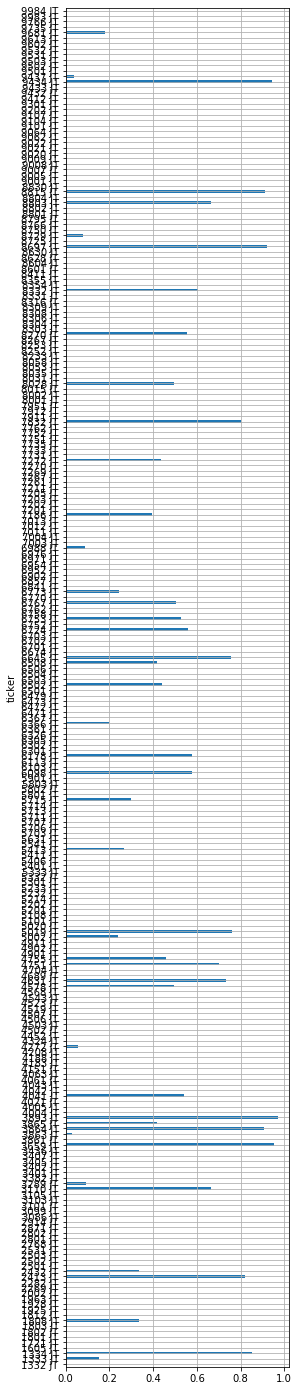

In [56]:
# missing stocks x dates ?
nb_missing_prices = date_df["last"].isna().sum()
rate_missing_prices = nb_missing_prices / df.date.nunique()

fig, ax = plt.subplots(figsize=(4,25))
ax1 = ax
rate_missing_prices.plot(kind="barh", ax=ax1)
ax1.grid()
# up to 80% missing data on some stocks

In [98]:
# see many stocks are have a lot of missing data
# most stocks have all date, we focus on these stocks.

selected_stocks = date_df.dropna(axis=1).columns.get_level_values(-1).unique()
print(f"Keep {len(selected_stocks)} stocks out of {df.ticker.nunique()}.")

Keep 202 stocks out of 248.


## II EDA

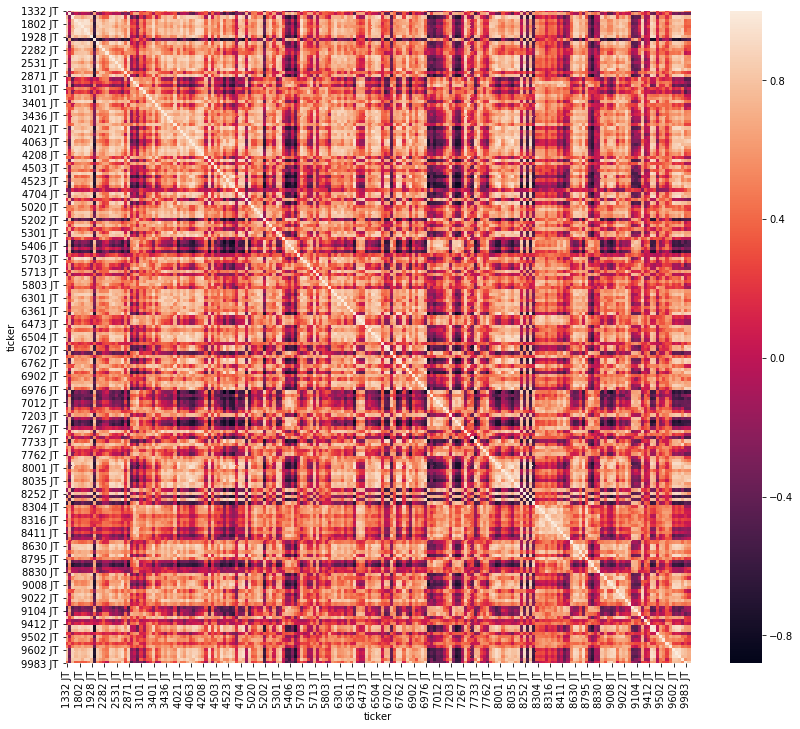

In [22]:
#Correlation ?
rdf = df[df.ticker.isin(selected_stocks)].set_index(["ticker", "date"]).unstack(0)
C = rdf["last"].corr()

fig, ax = plt.subplots(figsize=(14,12))
ax1 = ax
sns.heatmap(C, ax=ax1)

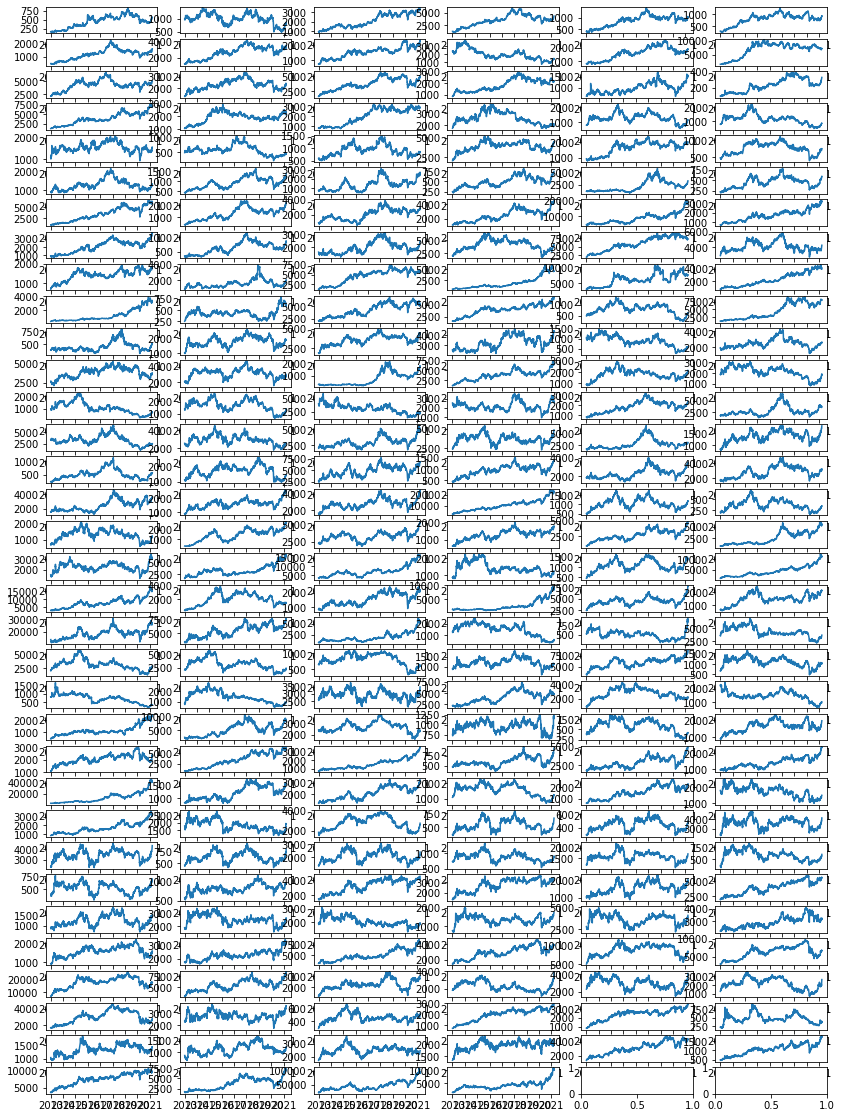

In [40]:
# sanity check on price data to see if there is anything bizarre
nb_col = 6
nb_row = - (-len(selected_stocks)//6)
fig, ax = plt.subplots(nb_row, nb_col, figsize=(14,20))

for i, tick in enumerate(selected_stocks):
    i_col = i % nb_col
    i_row = i // nb_col
    ax1 = ax[i_row, i_col]
    
    ax1.plot(rdf[("last", tick)])
    

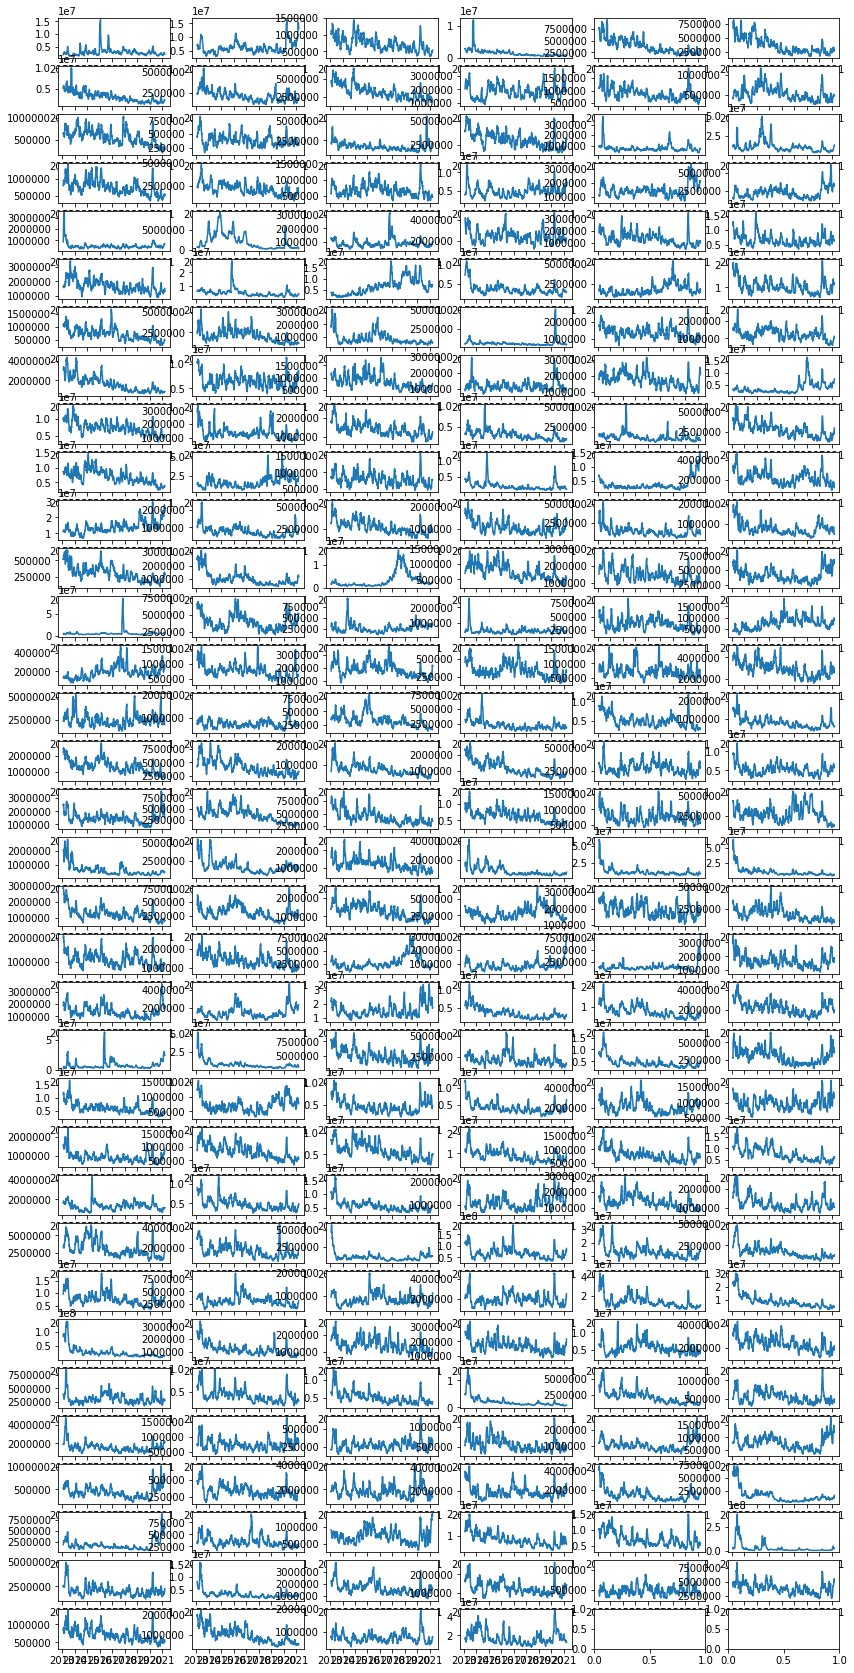

In [83]:
# check 20 moving avg of volumes
nb_col = 6
nb_row = - (-len(selected_stocks)//6)
fig, ax = plt.subplots(nb_row, nb_col, figsize=(14,30))

for i, tick in enumerate(selected_stocks):
    i_col = i % nb_col
    i_row = i // nb_col
    ax1 = ax[i_row, i_col]
    
    ax1.plot(rdf[("volume", tick)].rolling(20).mean())

We choose an investment horizon of 5 days.

We want to use info up to day $d$. So we adjust position on dayd $d+1$, so we exit position at day $d+6$.

So the target we are interested in:

$$
\forall s \text{ stock}, \quad \forall d \text{ day}, \quad perf5(s,d) = \frac{Price(s,d+6) - Price(s,d+1)}{Price(s,d+1)}
$$

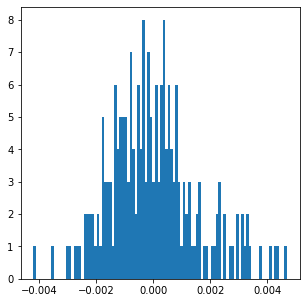

In [105]:
# Compute 5-day returns to serve as target
returns = (rdf["last"].shift(-6)-rdf["last"].shift(-1)) / rdf["last"].shift(-1)
returns = returns - returns.mean(axis=1).values[:, None]
returns.columns = pd.MultiIndex.from_tuples([("perf5", tick) for tick in returns.columns])

# Check distribution across stocks
fig, ax = plt.subplots(figsize=(5,5))
ax1 = ax
returns.mean().hist(bins=100, ax=ax1)
ax1.grid()

## More Features?

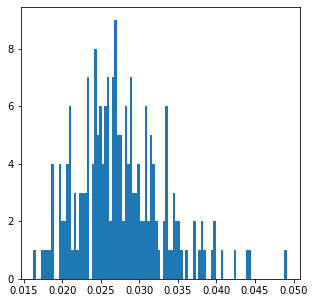

In [106]:
#20 day volatility of perf5
vol20 = returns["perf5"].rolling(20).std()
vol20.columns = pd.MultiIndex.from_tuples([("vol20", tick) for tick in vol20.columns])

# Check distribution across stocks
fig, ax = plt.subplots(figsize=(5,5))
ax1 = ax
vol20.mean().hist(bins=100, ax=ax1)
ax1.grid()